# Neural Networks

#### Linear Perceptron (or Artificial Neuron)
- In practice, a linear combination of weighted inputs
    
    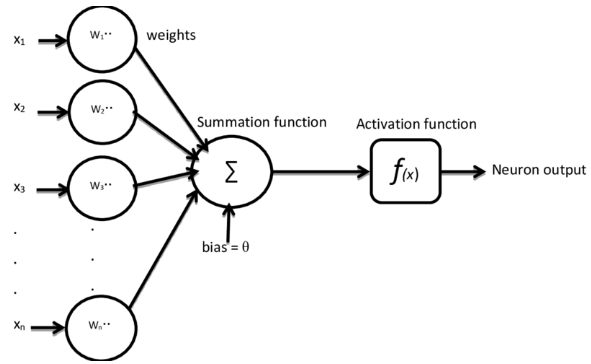
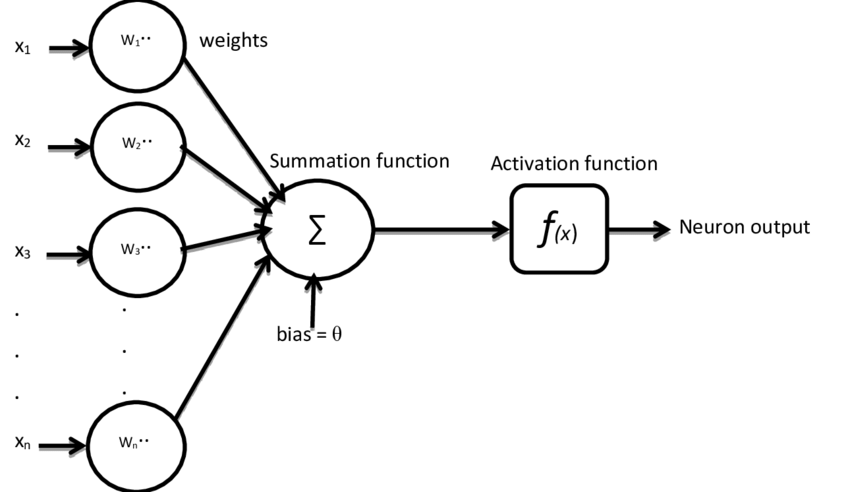
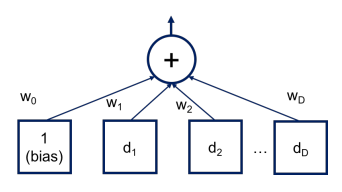

## Feed-forward Neural Networks or Multilayer Perceptrons (MLPs)
- A Neural Network is an arrangement of many perceptrons–like elements in a hierarchical structure.
- A layer of the neural network is a series of neurons that act in parallel. 
- The number of hidden layers + the output layer form the NN total number of layers.
    - The input feeds the *input layer*: 
        - one node for each dimension of the input
        - the input is one row of the dataset: multiple rows, multiple *independent* forward passes through the neural network. Only during backpragation the Error functions of all samples are taken to update the weights.
    - The input layer feeds the *hidden layers*: the number of nodes is a hyperparameter
    - The hidden layers feed  an *output layer*: one node if there are two classes (0/1); one node per class otherwise

    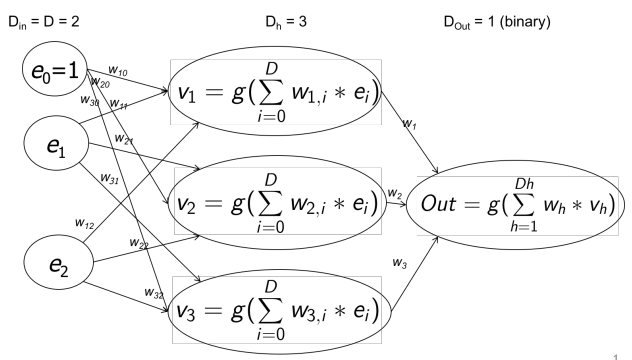

- Each hidden/output-layer neuron:
    1. receives as input a data (a signal, a real number)
    2. processes it, by multiplying by a weight plus a bias vector (which are specific to each neuron): $z=w^Tx+b$
    3. sums all the processed input data
    4. applies an element-wise nonlinear *activation function* $g(z)$
- Feed-forward means each node of one layer is connected to all the nodes of the following layer: in this way the signal flows from the input to the output, without loops

### Activation Function
- It's like passing data through a threshold
    - ***ReLU*** (Rectified Linear Unit)
        - $g(z)= max\{0, z\}$ 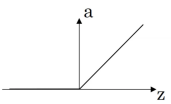
        - It's faster for training than others
        - The drawback is that the derivative is 0 when the value is negative
        - ReLU simplifies the space of activations because projects the data on the positive axes

        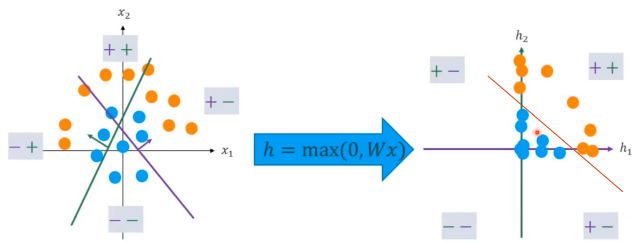
    - **sigmoid** ]0,1[ 
        - useful as an activation function for the output layer of a binary classification problem
    - **arctangent** ]-1.5,1.5[ 
        - works better than the sigmoid as activation of the hidden layers, because it's antisymmetric: if the network connectivity is large, backpropagation learning with antisymmetric activation functions can yield faster convergence than non-antisymmetric.
- The problem with sigmoid and arctangent is that when the value is too small or too large the derivative becomes really small and gradient descent slows down. Their use as activation functions for hidden units in feedforward networks is now discouraged.

- A linear activation function (therefore a linear neuron) is very affected by noise: $f(x_1+x_2) = f(x_1)+f(x_2)$. If $x_2$ is generated by noise, it is completely transferred to the output. In a non–linear system, in general, $f(x_1+x_2) \ne f(x_1)+f(x_2)$

### Deep Neural Network
- The difference between a Neural Network and a Deep Neural Network is that the former consists of a single layer of neurons, while the latter is composed of multiple layers of neurons. In other words, a DNN has at least three layers.

    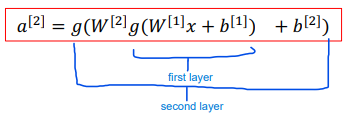

### Cost/Loss Function
- As in other supervised learning algorithms, the data is described by the function $y=f(x;\theta)$, where $\theta$ is a parameter. 
- The Neural Networks generate a function $\hat{y}$ where $\theta = \{W, b\}$
- FOR CLASSIFICATION: the Neural Networks define a distribution $P(y_i| x_i;\theta)$, that's the probability of output $y_i$ given the sample $x_i$ with parameters $\theta$
    - The *Likelihood function* (over all $N$ the samples) is defined as 
    <br>$L(\hat{y},y)=\prod_{1}^{N}P(y_i| x_i;\theta)$, which is taken as *negative log-likelihood*: 
    <br>$L(\hat{y},y)=-\sum_{i=1}^{N}log\space P(y_i| x_i;\theta)$
    <br>that becomes the *Cross-Entropy* <sup>[(proof)](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#Relation_to_minimizing_Kullback%E2%80%93Leibler_divergence_and_cross_entropy)</sup> between the training data and the model's predictions: 
        - for Multi-class Classification (over one sample $x_i$):  $$L(\hat{y_i},y_i)_{multi}=-\sum_{c=1}^{C}y_c * log(\hat{y_c})$$
        - for Binary Classification (over one sample $x_i$):
    $$L(\hat{y_i}, y_i)_{binary} = -(y * log(\hat{y}) + (1 - y) * log(1 - \hat{y}))$$
- FOR REGRESSION: the Likelihood (of ona sample $x_i$) can simply be the MSE between $\hat{y_i},y_i$
<br>

- The Loss Function is the mean over all the samples: $$J(W,b)=\frac{1}{n}\sum_{i=1}^{N}L(\hat{y_i}, y_i)$$

- We are trying to obtain the weights that minimize the Loss Function: $$\hat{\theta} = \argmin_{\theta}J(\theta)$$

### Gradient Descent
- Neural networks are usually trained using iterative and gradient-based optimizers that drive the cost function to a very low value

- To try to reach the global minimum of the error function, it's necessary to calculate its derivatives, going backwards through the NN, and updating the weights to decrease the total error.

- It's used the derivative of the loss function because: (as $f$ the loss function) it gives the slope of $f(x)$ at the point $x$, and it tells how to change $x$ to make a small improvement in $f(x)$: $f(x+\epsilon)=f(x)+\epsilon f'(x)$

- The weights are changed by subtracting the partial derivative multiplied by a *learning rate* $\alpha$ constant. The learning rate influences the convergence speed and can be adjusted as a tradeoff between speed and precision. $$w = w-\alpha * \frac{\partial J(w,b)}{\partial w}$$ $$b = b-\alpha * \frac{\partial J(w,b)}{\partial b}$$

- Of course, the gradient descent stops if the weights change no more, that's when the derivative is zero.

- The convergence point of gradient descent depends on the initial values of the parameters
- For feedforward neural networks, it is important to:
    - initialize all weights to small random values (there are several techniques for initialization)
    - initialize biases to zero or small positive values
- To apply gradient-based learning we must choose:
    - a cost function
    - how to represent the output of the model

#### Back-propagation
- The Back-propagation algorithm is an actual neural network in which each neuron computes a derivative. It allows the information from the cost to flow backwards through the network, in order to compute the gradient
    - it refers only to the method for computing the gradient
    - learning is performed using this gradient with, for example, gradient descent
- That's why the network is much more time-consuming during the training phase.

- Since our training set is composed by mulitple samples, the derivatives must be computed over each samples and the final update quantity must be averaged over the number of samples. It is possible to exploit vectorization for all these computations, both forward and backward, allowing for a faster processing: usage of graphical processing unit (GPU)
- **Epoch**: a learning round over all the samples of the network. In general, after each epoch the network classification capability will be improved

### Stochastic Gradient Descent
- SGD is an iterative method for optimizing an objective function for very large datasets.
- It’s a stochastic approximation of gradient descent optimization, replacing the actual gradient with an estimate calculated from a randomly selected subset of the data.
- Suitable for larger datasets, as it updates the model’s parameters more frequently:
    - "Stochastic" is 1 forward and immediately 1 backward
    - "Minibatch" is an arbitrary number of samples, typically a power of 2 for GPU parallelization (the cost function is divided by the size of the minibatch,instead of $N$). Generally yelds faster and stable descent towards the local minimum, since the update is performed in the direction of the average error
- Reduces the chance of getting stucked in a local minimum
- The solutions found may be less accurate or stable due to the randomness in the gradient approximation. It may be a little more noisy as a process because overall the error calculated from a minibatch it may be higher than the one from the whole training set.
- If you have a small training size (<=2000) and a limited number of variables you can use gradient descent
- One epoch corresponds to having observed the whole training set one time

### DNN Architecture
- Deeper networks often are able to use far fewer units per layer and far fewer parameters and often generalize to the test set, but are also often harder to optimize
- The ideal network architecture for a task must be found via experimentation guided by monitoring the validation set error
- Universal Approximation Theorem: regardless of what function we are trying to learn, we know that a large MLP will be able to represent this function.  Unfortunately, in the worse case, an exponential number of hidden units (possibly with one hidden unit corresponding to each input configuration that needs to be distinguished) may be required.
- Empirically, greater depth does seem to result in better generalization for a wide variety of tasks
- Given a very deep neural network composed by several layers, during forward or backward passes:
    - if we perform several multiplication for small weights -> *Vanishing gradient*: the network requires a longer times to train
    - if we perform several multiplication for large weights -> *Exploding gradient*
- What do we do in case of high bias?
    - Bigger network
    - Longer training
    - Different architectures
- What do we do in case of high variance?
    - *More data*
    - *Regularization*
    - *Early stopping*: while training, also observe the error on the valuation set and select the model that generalized better on the valuation set
    - Different architectures

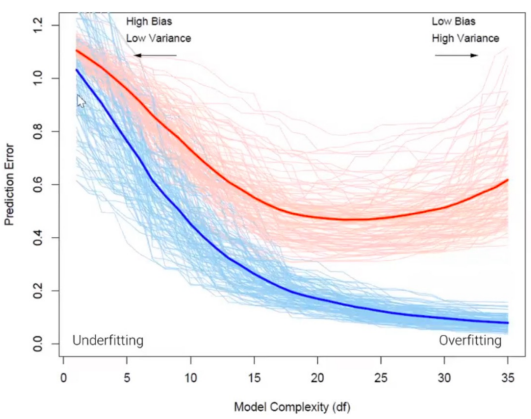


## Regularization (in case of high variance)
 - “Any modification we make to a learning algorithm that is intended to reduce its generalization error but not its training error”
### L2 Regularization
- The regularization prevents overfitting by *inhibiting the contribution of some neurons*, by adding a parameter norm penalty to the loss function that will modify the derivatives on backpropagation (*weight decay*)
$$J(W, b) = \text{...usual...} + \frac{\lambda}{2n} \sum_{l=1}^{L} ||W^{[l]}||^2_F$$
- $\lambda$ is a hyperparameter to find over the validation set. With large $\lambda$ the weights are close to zero and the model becomes simpler (potentially with higher bias)

### Dropout Regularization
- Different (non-output) neurons are *disabled at each minibatch* (forward and backward passes), focusing each iteration on different (smaller) subnetworks, spreading the weights.
- For each layer in the network you need to choose a probability of not considering some of the weights (neuron connections). For example, 50% means not considering 50% of the neurons of that layer.

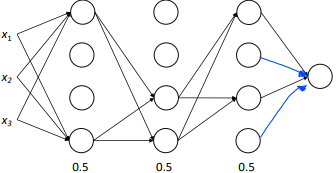

- This way the network is forced to use all the nodes, discovering possibly different patterns.
    - For layers with many weights use a large dropout probability: it helps preventing overfitting
    - For layers with a small number of weights use a lower dropout probability
- At test time the dropout is not applied, otherwise the results would change at every forward pass

## Optimizers
- The Stochastic Gradient Decent doesn't take advantage of the history of its descent, resulting in a very noisy descent.

### Momentum

### RMSprop

### Adam

In [15]:
import random
import os

import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, Subset
from torch.utils.tensorboard import SummaryWriter  # log writer per visualizzare le loss

In [16]:
# For reproducibility, fix all the seeds


def fix_random(seed: int) -> None:
    """Fix all the possible sources of randomness.

    Args:
        seed: the seed to use.
    """
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True  # slower

In [17]:
# Define the Data Layer
# It must be extended to implement three methods


class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)  # the type is choosen by the type of the data
        self.y = torch.LongTensor(y)

        self.num_features = X.shape[1]
        self.num_classes = len(np.unique(y))

    def __len__(self):  # how many samples
        return self.X.shape[0]

    def __getitem__(
        self, idx
    ):  # return a single element of dataset (single sample or batch) (if the dataset is not in memory, it can read from file system and return the object)
        return self.X[idx, :], self.y[idx]

In [18]:
# define a simple neural network


class FeedForward(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedForward, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size

        # Two layers
        self.fc2 = nn.Linear(self.hidden_size, num_classes)  # hidden to output
        self.fc1 = nn.Linear(self.input_size, self.hidden_size)  # input to hidden

        # activation function
        self.relu = nn.ReLU()

    # How layers are connected between them. This even defines the graph of backpropagation.
    def forward(self, x):
        h = self.fc1(x)  # first layer
        h = self.relu(h)  # activation function
        output = self.fc2(h)  # second layer
        return output

In [19]:
# Define a function for the training process
# model: instance of class to train
# criterion: loss function (cross-entropy, ...)
# optimizer
# epoch: number of
# train_loader and val_loader: who gives the batches
# device: cpu/gpu where i train
# writer and log_name: logging


def train_model(
    model,
    criterion,
    optimizer,
    epoch,
    train_loader,
    val_loader,
    device,
    writer,
    log_name="model",
):
    n_iter = 0
    best_valid_loss = float("inf")  # worst valid loss
    for epoch in range(epoch):
        model.train()  # activate train dropout level

        for (
            data,
            targets,
        ) in train_loader:  # get_item from MyDataset class (single item or batch)
            data, targets = data.to(device), targets.to(device)  # move data and targets to cpu/gpu

            optimizer.zero_grad()  # gradient to zero

            # Forward pass
            y_pred = model(data)

            # Compute Loss
            loss = criterion(y_pred, targets)
            writer.add_scalar("Loss/train", loss, n_iter)  # plot the batches

            # Backward pass
            loss.backward()
            optimizer.step()

            n_iter += 1

        labels, _, y_pred = test_model(model, val_loader, device)
        loss_val = criterion(y_pred, labels)
        writer.add_scalar("Loss/val", loss_val, epoch)  # plot the epochs

        # save best model
        if loss_val.item() < best_valid_loss:
            best_valid_loss = loss_val.item()
            if not os.path.exists("models"):
                os.makedirs("models")
            torch.save(model.state_dict(), "models/" + log_name)

    return model

In [20]:
# Define a function to evaluate the performance on validation and test sets


def test_model(model, data_loader, device):
    model.eval()  # activate evaluation dropout level
    y_pred = []
    y_test = []

    for data, targets in data_loader:
        data, targets = data.to(device), targets.to(device)
        y_pred.append(model(data))  # accumulate predictions
        y_test.append(targets)  # accumulate labels

    y_test = torch.stack(y_test).squeeze()
    y_pred = torch.stack(y_pred).squeeze()
    y_pred_c = y_pred.argmax(
        dim=1, keepdim=True
    ).squeeze()  # return max position of prediction array, that is the class I will associate with the sample

    return y_test, y_pred_c, y_pred

In [21]:
# look for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))

Device: cpu


In [22]:
seed = 42

# Train hyperparameters
num_epochs = 100  # try 100, 200, 500
learning_rate = 0.01
batch = 32

In [23]:
data = datasets.load_iris()
X = data["data"]
y = data["target"]
indices = np.arange(X.shape[0])  # trick of Pytorch to split the data in train/val/test

# Separate indices
train_idx, test_idx = train_test_split(indices, test_size=0.2, stratify=y, random_state=seed)
train_idx, val_idx = train_test_split(train_idx, test_size=0.2, stratify=y[train_idx], random_state=seed)


# Scale data
train_mean = np.mean(X[train_idx, :], axis=0)
train_std = np.std(X[train_idx, :], axis=0)  # use only train
X = (X - train_mean) / train_std  # but apply to all dataset


# Create the dataset
my_dataset = MyDataset(X, y)


# Create subsets and relative dataloader
train_subset = Subset(my_dataset, train_idx)
train_loader = DataLoader(train_subset, batch_size=batch, shuffle=True)

val_subset = Subset(my_dataset, val_idx)
val_loader = DataLoader(val_subset, batch_size=1)

test_subset = Subset(my_dataset, test_idx)
test_loader = DataLoader(test_subset, batch_size=1)

Run Tensorboard from the command line:

"tensorboard --logdir runs/"

In [24]:
# fix the seed for reproducibility
fix_random(seed)


# Start tensorboard
writer = SummaryWriter()


# Define the architecture, loss and optimizer
hidden_size = 32  # architecture hyperparameter
model = FeedForward(my_dataset.num_features, hidden_size, my_dataset.num_classes)
model.to(device)  # move the NN to device
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  # W and beta and learning rate


# Test before the training
y_test, y_pred_c, _ = test_model(model, test_loader, device)
acc = (y_test == y_pred_c).float().sum() / y_test.shape[0]
print("Accuracy before training:", acc.cpu().numpy())


# Train the model
model = train_model(model, criterion, optimizer, num_epochs, train_loader, val_loader, device, writer)


# Load best model
model.load_state_dict(torch.load("models/model"))
model.to(device)


# Test after the training
y_test, y_pred_c, _ = test_model(model, test_loader, device)
acc = (y_test == y_pred_c).float().sum() / y_test.shape[0]
print("Accuracy after training:", acc.cpu().numpy())


# Close tensorboard writer after a training
writer.flush()
writer.close()

Accuracy before training: 0.6666667


Accuracy after training: 0.8


In [25]:
# Let's define a new architecture


class FeedForwardPlus(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, depth=1):
        super(FeedForwardPlus, self).__init__()

        model = [
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
        ]

        # Set of pytorch modules
        block = [
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),  # BatchNorm 1 dimention
            nn.ReLU(),
        ]

        for i in range(depth):
            model += block

        # Create sequential graph
        self.model = nn.Sequential(*model)

        # Output layer
        self.output = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h = self.model(x)
        out = self.output(h)
        return out

In [26]:
# fix the seed for reproducibility
seed = 42
fix_random(seed)


# Start tensorboard
writer = SummaryWriter()


# Define the architecture, loss and optimizer
depth = 2  #  new hyperparameter
model = FeedForwardPlus(my_dataset.num_features, hidden_size, my_dataset.num_classes, depth)
print(model)
model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


# Test before the training
y_test, y_pred_c, _ = test_model(model, test_loader, device)
acc = (y_test == y_pred_c).float().sum() / y_test.shape[0]
print("Accuracy before training:", acc.cpu().numpy())


# Train the model
model = train_model(model, criterion, optimizer, num_epochs, train_loader, val_loader, device, writer)


# Load best model
model.load_state_dict(torch.load("models/model"))
model.to(device)


# Test after the training
y_test, y_pred_c, _ = test_model(model, test_loader, device)
acc = (y_test == y_pred_c).float().sum() / y_test.shape[0]
print("Accuracy after training:", acc.cpu().numpy())
# from sklearn.metrics import classification_report
# print(classification_report(y_test.cpu(), y_pred_c.cpu()))


# Close tensorboard writer after a training
writer.flush()
writer.close()

FeedForwardPlus(
  (model): Sequential(
    (0): Linear(in_features=4, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=32, bias=True)
    (7): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
  (output): Linear(in_features=32, out_features=3, bias=True)
)
Accuracy before training: 0.33333334
Accuracy after training: 0.93333334


In [27]:
# Grid Search
fix_random(seed)


# hyperparameters
hidden_sizes = [16, 32]
depths = [2, 4]
num_epochs = 1000
learning_rate = 0.01

import itertools

hyperparameters = itertools.product(hidden_sizes, depths)


# grid search loop
for hidden_size, depth in hyperparameters:
    fix_random(seed)

    log_name = "dim" + str(hidden_size) + "-dp" + str(depth) + "-ep" + str(num_epochs) + "-lr" + str(learning_rate)

    # start tensorboard
    writer = SummaryWriter("runs/" + log_name)

    # define architecture, loss and optimizer
    model = FeedForwardPlus(my_dataset.num_features, hidden_size, my_dataset.num_classes, depth)
    model.to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # train
    model = train_model(
        model,
        criterion,
        optimizer,
        num_epochs,
        train_loader,
        val_loader,
        device,
        writer,
        log_name,
    )

    writer.flush()
writer.close()

In [28]:
# Choose and load the best model and evaluate it on the test set

# Re-instantiate the model and read best weights
model = FeedForwardPlus(my_dataset.num_features, 16, my_dataset.num_classes, 4)
model.load_state_dict(torch.load("models/dim16-dp4-ep1000-lr0.01"))
model.to(device)

y_test, y_pred_c, _ = test_model(model, test_loader, device)
acc = (y_test == y_pred_c).float().sum() / y_test.shape[0]

print("Accuracy of the best model on the test set:", acc.cpu().numpy())

Accuracy of the best model on the test set: 0.93333334
